<a href="https://colab.research.google.com/github/LuizFelipeLemon/machine_learning/blob/master/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import Libraries 

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [67]:
#Get the stock quote

df = web.DataReader('PETR4.SA',data_source='yahoo', start='2012-01-01',end='2020-01-16')

df.shape

(1983, 6)

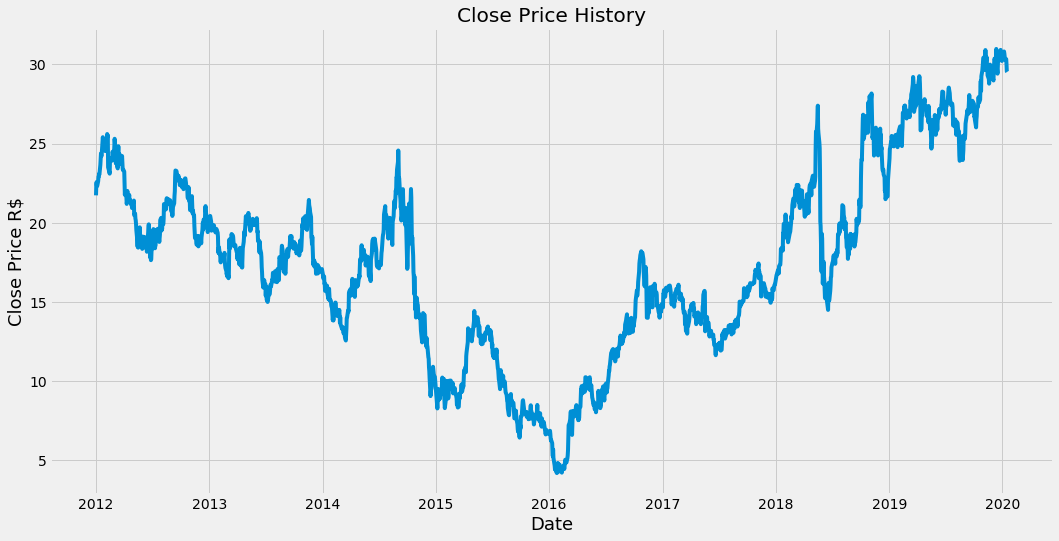

In [68]:
# Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price R$',fontsize=18)
plt.show()

In [69]:
# Create a new dataframe with only the closing price
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) *.8)
dataset.shape

(1983, 1)

In [0]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the Training dataset

train_data = scaled_data[0:training_data_len,:]

x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [0]:
# Convert
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape
# Reshape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [0]:
# Create the LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [0]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [74]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
 

Epoch 1/1
1527/1527 [==============================] - 125s 82ms/step - loss: 0.0025


In [0]:
# Create the testing dataset
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x and y
x_test = []
y_test = dataset[training_data_len:, :] 

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [0]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
#Get the models predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [78]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.636790106994937

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


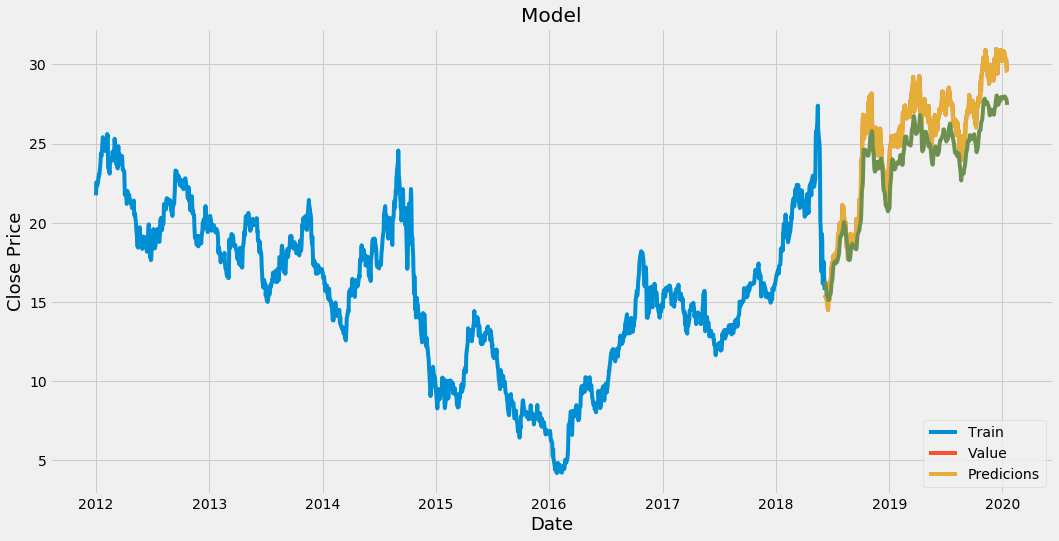

In [79]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Value','Predicions'], loc='lower right')
plt.show()